In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8
from scipy.stats import boxcox

pd.options.display.float_format = '{:.5f}'.format

In [2]:
dataset = pd.read_csv("USCarrier_Traffic_20200602120518.csv", index_col='Period',parse_dates=True,infer_datetime_format=True)

In [3]:
dataset.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


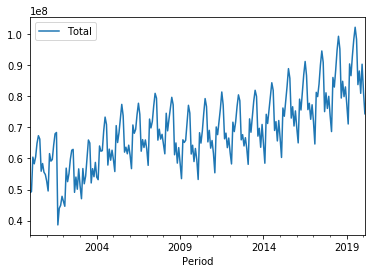

In [4]:
dataset.plot(kind='line')

In [5]:
#creating a function for checking data whether it is stationary or not.
from statsmodels.tsa.stattools import adfuller
def check_stationary(timeSeries):
    
    rolMean = timeSeries.rolling(window = 12).mean()
    rolstd = timeSeries.rolling(window = 12).std()
    
    plt.subplot(111)
    plt.plot(timeSeries, label = 'Original')
    plt.plot(rolMean, label = 'Rolling mean')
    plt.plot(rolstd, label = 'Rolling STD')
    plt.legend(loc='best')
    plt.show()
    
    dftest = adfuller(timeSeries,autolag='AIC')

    dfoutput = pd.Series(dftest[:4],index = ["Test Statistic","P-Value","No of Lags","No of obs"])
    for key, value in dftest[4].items():
        dfoutput['Critical value %s'%key] = value
        
    print(dfoutput)

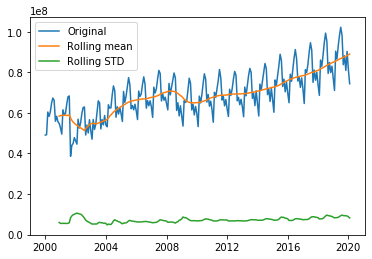

Test Statistic         0.22322
P-Value                0.97353
No of Lags            13.00000
No of obs            228.00000
Critical value 1%     -3.45936
Critical value 5%     -2.87430
Critical value 10%    -2.57357
dtype: float64


In [6]:
check_stationary(dataset)

##### The additive additive model is useful useful when thethe seasonal variation is  relatively constant over time

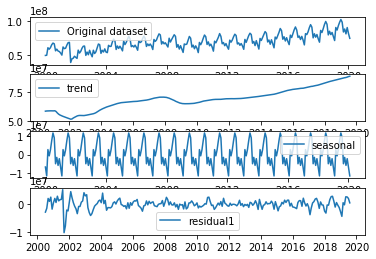

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset,model='additive',period=12)
#decomposition = seasonal_decompose(datasetShiftting,model='Mul')

# Here we have 3 components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plot the components
plt.subplot(411)
plt.plot(dataset, label = 'Original dataset')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'residual1')
plt.legend(loc = 'best')


plt.show()

In [8]:
train = dataset[:round(len(dataset)*0.9)]
test = dataset[round(len(dataset)*0.9):]

train.tail()

,Total
Period,
2017-10-01,81168038
2017-11-01,76124199
2017-12-01,80037670
2018-01-01,73795632
2018-02-01,68674042


In [9]:
from statsmodels.tsa.api import ExponentialSmoothing

In [10]:
holtsExpoData = ExponentialSmoothing(dataset, trend='additive',seasonal='additive',seasonal_periods=12).fit()
holtsExpoData.summary()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Dep. Variable:,endog,No. Observations:,242
Model:,ExponentialSmoothing,SSE,977500137331143.250
Optimized:,True,AIC,7056.554
Trend:,Additive,BIC,7112.377
Seasonal:,Additive,AICC,7059.621
Seasonal Periods:,12,Date:,"Thu, 18 Jun 2020"
Box-Cox:,False,Time:,22:19:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4736842,alpha,True
smoothing_slope,0.0526316,beta,True


In [11]:
forecast = holtsExpoData.predict(start='2020-02-01', end='2022-02-01')
forecast

2020-02-01    76740740.71953
2020-03-01    93300757.55160
2020-04-01    89936715.07900
2020-05-01    95286769.27081
2020-06-01   100562490.40597
2020-07-01   104507423.02329
2020-08-01   100490319.49579
2020-09-01    86146473.45179
2020-10-01    90914983.92030
2020-11-01    84990086.11882
2020-12-01    90940779.61578
2021-01-01    83727608.39164
2021-02-01    78648318.17487
2021-03-01    96317688.61093
2021-04-01    92953646.13833
2021-05-01    98303700.33014
2021-06-01   103579421.46529
2021-07-01   107524354.08262
2021-08-01   103507250.55512
2021-09-01    89163404.51112
2021-10-01    93931914.97963
2021-11-01    88007017.17815
2021-12-01    93957710.67511
2022-01-01    86744539.45097
2022-02-01    81665249.23420
Freq: MS, dtype: float64

In [12]:
holtsExpo = ExponentialSmoothing(train, trend='additive',seasonal='additive',seasonal_periods=12).fit()
holtsExpo.summary()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,218
Model:,ExponentialSmoothing,SSE,3204167573443707.500
Optimized:,True,AIC,6641.484
Trend:,Additive,BIC,6695.636
Seasonal:,Additive,AICC,6644.921
Seasonal Periods:,12,Date:,"Thu, 18 Jun 2020"
Box-Cox:,False,Time:,22:19:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,True
smoothing_slope,0.000000,beta,True


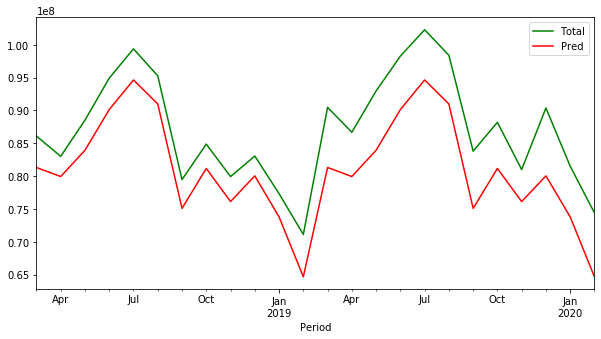

In [13]:
holtsExpoPred = holtsExpo.forecast(24)
#train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='green')
holtsExpoPred.plot(kind="line",figsize=(10,5),color='red',legend=True,label='Pred')
plt.show()

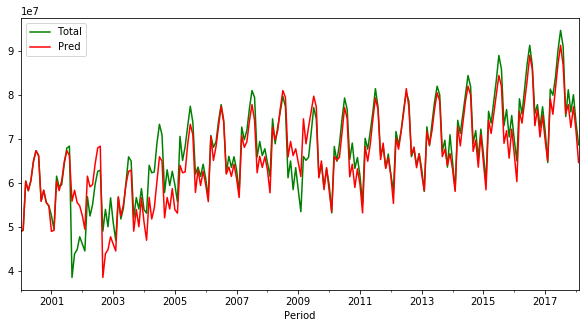

In [14]:
holtsExpotrainPred = holtsExpo.predict(start = '2000-01-01', end= '2018-02-01')
#train.plot(kind="line",figsize=(10,5),legend=True)
train.plot(kind="line",figsize=(10,5),legend=True, color='green',label='train')
holtsExpotrainPred.plot(kind="line",figsize=(10,5),color='red',legend=True,label='Pred')
plt.show()

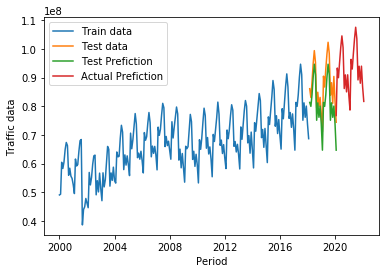

In [15]:
plt.plot(train,label="Train data")
plt.plot(test,label="Test data")
plt.plot(holtsExpoPred,label="Test Prefiction")
plt.plot(forecast,label="Actual Prefiction")
plt.legend(loc='best')
plt.xlabel("Period")
plt.ylabel("Traffic data")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print("MSE for test data: ",mean_squared_error(test,holtsExpoPred))
print("RMSE for test data: ",np.sqrt(mean_squared_error(test,holtsExpoPred)))
print("RSS for test data: ", sum((test.Total - holtsExpoPred)**2))
#print("R-square test data: ", r2_score(test,holtsExpoPred))

print("Mean absolute error for test data: ",np.sqrt(mean_absolute_error(test,holtsExpoPred)))

MSE for test data:  42829729663208.73
RMSE for test data:  6544442.65489497
RSS for test data:  1027913511917009.4
Mean absolute error for test data:  2480.3060317474956


In [17]:
print("MSE for train data: ",mean_squared_error(train,holtsExpotrainPred))
print("RMSE for train data: ",np.sqrt(mean_squared_error(train,holtsExpotrainPred)))
print("RSS for train data: ", sum((train.Total - holtsExpotrainPred)**2))
#print("R-square test data: ", r2_score(test,holtsExpoPred))

print("Mean absolute error for train data: ",np.sqrt(mean_absolute_error(train,holtsExpotrainPred)))

MSE for test data:  14698016391943.61
RMSE for test data:  3833799.211219024
RSS for test data:  3204167573443710.5
Mean absolute error for test data:  1681.349647854534


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
# we cannot performm GridSerach on the Holts winter method
ex = ExponentialSmoothing(dataset.Total)

params = {'trend' :["additive", "multiplicative"],
          'seasonal' :["additive", "multiplicative"],
          'seasonal_periods' : [12],
         }

mod = GridSearchCV(ex,params)
mod.fit(dataset.Total)

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


TypeError: Cannot clone object '<statsmodels.tsa.holtwinters.ExponentialSmoothing object at 0x000000EEC7C2C648>' (type <class 'statsmodels.tsa.holtwinters.ExponentialSmoothing'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.